# Investigate The TMDb Movie Dataset (cleaned from original data on Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I made an analysis of movie dataset from TMDb. In this dataset, you can see movie datas such as casts, directors, genres,budgets, and revenue, etc. I cleaned this database to be able to read easily, and made some graphs to find trends.

>The dataset is available here (https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1585257433409000)

>In particular, I am interested in finding trends among these questions below: 

>**①Which genres are most popular from year to year?**

>**②What kinds of properties are associated with movies that have high revenues?**

>**③Do longer movies have higher average votes?**

>**④Which directors make more profit?**

In [1]:
#import modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Load the csv database
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
#Check how many colums and rows in the database
df.shape

(10866, 21)

In [4]:
#Check datatypes, column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning

In [5]:
#Check columns
pd.DataFrame(df.columns)

,0
0,id
1,imdb_id
2,popularity
3,budget
4,revenue
5,original_title
6,cast
7,homepage
8,director
9,tagline


In [6]:
#Drop columns I do not need(I use bunget_adj and revenue_adj instead budget and revenue for equal comparison)
coldrop = df.iloc[:,np.r_[1,3,4,6,7,9:12,15:17]].columns
df.drop(coldrop, axis = 1,inplace = True)

In [11]:
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#Check nulls
df.isnull().any()

id                      False
popularity              False
original_title          False
director                 True
runtime                 False
genres                   True
production_companies     True
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [13]:
#See nulls in 'director' column
df[df['director'].isnull()]

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,Iliza Shlesinger: Freezing Hot,NaN,71,Comedy,New Wave Entertainment,6.6,2015,0.000000e+00,0.000000e+00
548,355131,0.108072,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,Netflix,7.5,2015,0.000000e+00,0.000000e+00
556,321160,0.100910,With This Ring,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,0.291253,Marvel Studios: Assembling a Universe,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,0.269468,Unlocking Sherlock,NaN,60,TV Movie|Documentary,NaN,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,0.119891,Free to Play,NaN,75,Documentary,Valve,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,0.135376,Dance-Off,NaN,0,Romance|Music|Comedy,NaN,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,0.038364,Top Gear: The Perfect Road Trip 2,NaN,94,Documentary,2 Entertain Video,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,0.256703,The Diary of Anne Frank,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,0.091395,Paa,NaN,133,Drama|Family|Foreign,A B Corp,6.1,2009,3.303301e+06,0.000000e+00


In [14]:
#See nulls in 'genre' column
df[df['genres'].isnull()]

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,Belli di papÃ,Guido Chiesa,100,NaN,NaN,6.1,2015,0.00000,0.0
620,361043,0.129696,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,5.0,2015,0.00000,0.0
997,287663,0.330431,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,NaN,6.8,2014,0.00000,0.0
1712,21634,0.302095,Prayers for Bobby,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,7.4,2009,0.00000,0.0
1897,40534,0.020701,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,NaN,7.0,2009,0.00000,0.0
2370,127717,0.081892,Freshman Father,Michael Scott,0,NaN,NaN,5.8,2010,0.00000,0.0
2376,315620,0.068411,Doctor Who: A Christmas Carol,NaN,62,NaN,NaN,7.7,2010,0.00000,0.0
2853,57892,0.130018,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,7.2,2001,0.00000,0.0
3279,54330,0.145331,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,NaN,6.1,2008,0.00000,0.0
4547,123024,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,BBC,8.3,2012,0.00000,0.0


In [15]:
#See nulls in 'production_companies' column
df[df['production_companies'].isnull()]

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
228,300792,0.584363,Racing Extinction,Louie Psihoyos,90,Adventure|Documentary,NaN,7.8,2015,0.0,0.0
259,360603,0.476341,Crown for Christmas,Alex Zamm,84,TV Movie,NaN,7.6,2015,0.0,0.0
295,363483,0.417191,12 Gifts of Christmas,Peter Sullivan,84,Family|TV Movie,NaN,6.3,2015,0.0,0.0
298,354220,0.370258,The Girl in the Photographs,Nick Simon,95,Crime|Horror|Thriller,NaN,4.7,2015,0.0,0.0
328,308457,0.367617,Advantageous,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,0.149259,Interiors,Woody Allen,93,Drama,NaN,6.3,1978,0.0,0.0
10806,24998,0.138635,Gates of Heaven,Errol Morris,85,Documentary,NaN,5.9,1978,0.0,0.0
10816,16378,0.064602,The Rutles: All You Need Is Cash,Eric Idle|Gary Weis,76,Comedy,NaN,6.0,1978,0.0,0.0
10842,36540,0.253437,Winnie the Pooh and the Honey Tree,Wolfgang Reitherman,25,Animation|Family,NaN,7.9,1966,0.0,0.0


In [16]:
#All null value lines do not have budget and revenue data
#Dropping null values is better than just putting average budget and revenue data for accurate analysys, so I will drop them

In [17]:
#Drop nulls
df.dropna(inplace=True)

In [18]:
#Check duplicated data
sum(df.duplicated())

1

In [19]:
#Drop duplicated data
df.drop_duplicates(inplace=True)

In [20]:
#Rename 'budget' (budget_adg shows adjusted currency value and it is better for acculate analysis)
df=df.rename(columns={'budget_adj':'budget'})

In [21]:
#Rename 'revenue' for the same reason
df=df.rename(columns={'revenue_adj':'revenue'})

In [22]:
#Check columns names
df.head(1)

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09


In [23]:
#Save edited dataframe to csv
df.to_csv('tmdb-movies_edited.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis.

>## ①Which genres are most popular from year to year?

### ・Break down genres
### There are some datas has multiple genres 

In [24]:
#Load csv file
df=pd.read_csv('tmdb-movies_edited.csv')

In [25]:
#'genre'needs a modification as some data has multipul information
multi_genres = df[df['genres'].str.contains('\|')]
multi_genres

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...
9798,31918,0.317824,"The Russians Are Coming, The Russians Are Coming",Norman Jewison,126,Comedy|War,The Mirisch Corporation,5.5,1966,0.000000e+00,0.000000e+00
9799,20620,0.089072,Seconds,John Frankenheimer,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,6.6,1966,0.000000e+00,0.000000e+00
9802,20379,0.065543,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966,0.000000e+00,0.000000e+00
9803,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,6.5,1966,0.000000e+00,0.000000e+00


In [26]:
#It looks some genre cells contain 4 genres like Action|Adventure|Science Fiction|Thriller.
#So I will split them into 4.
def func(genre_index):
    
#make copies
    dfx = multi_genres.copy(deep = True)
    
#assign movies into each df with only one kind of genre
    dfx['genres'] = dfx['genres'].apply(lambda x: x.split('|')[genre_index])
    return dfx

In [27]:
#Splitted dataframes
df1 = func(0)
df2 = func(1)
df3 = func(-1)
df4 = func(-2)

In [28]:
##Append dataframes together and drop duplicates
new_rows = df4.append(df3.append(df1.append(df2)))
new_rows.drop_duplicates(inplace= True)

In [29]:
#Check for duplicates
new_rows.duplicated().any()

False

In [30]:
#Drop multigenres from original dataframe
#Then append new_rows to original dataframe
df.drop(multi_genres.index, inplace=True)

In [31]:
#This is new dataframe
df = df.append(new_rows)

In [32]:
#Aggregation
popular_genres = df.groupby(['release_year','genres'])['popularity'].mean()
popular_genres

release_year  genres         
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Crime              0.346480
              Drama              0.587631
                                   ...   
2015          Science Fiction    2.309940
              TV Movie           0.280440
              Thriller           1.486609
              War                1.438548
              Western            3.178796
Name: popularity, Length: 1041, dtype: float64

In [33]:
#Unstuck multi-index series
new_df = popular_genres.unstack()
new_df.head(1)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,NaN,0.396,0.34648,NaN,0.587631,0.278064,0.144106,NaN,0.412364,0.59145,0.423531,NaN,0.541227,0.327905,NaN,0.81191,0.225863,0.567759


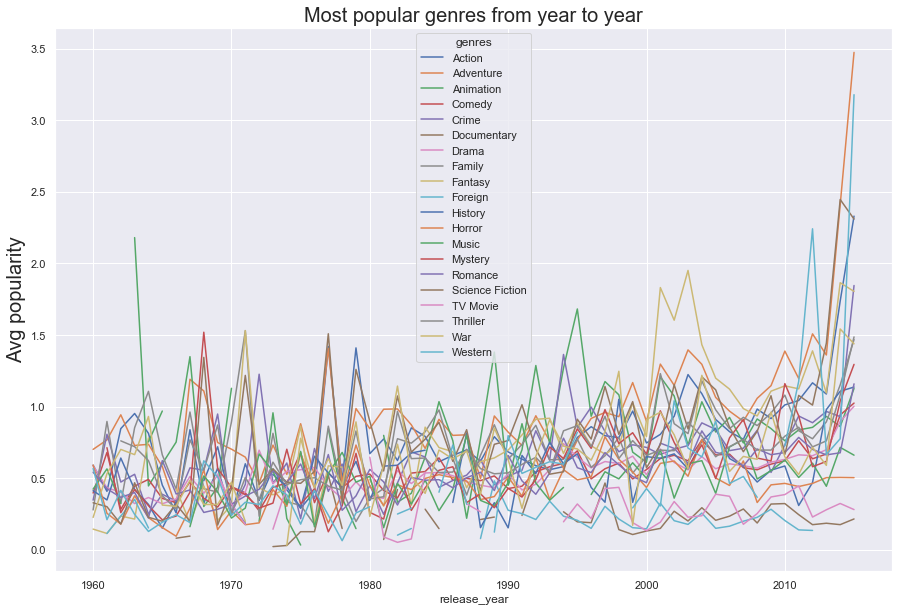

In [34]:
#Make a graph to show consistent changes over years

new_df.plot(figsize= (15,10))
plt.title('Most popular genres from year to year',fontsize=20)
plt.ylabel('Avg popularity',fontsize=20);

### The bar chart looks too messy to figure out what is the most popular genres...

In [35]:
#What genre has the highest average_popularity by year?
highest_avg_pop = new_df.max(axis = 1)
highest_avg_pop.head()

release_year
1960    0.811910
1961    2.631987
1962    0.942513
1963    2.180410
1964    1.106397
dtype: float64

In [36]:
#Show highest average popularlity on the dataframe
highest_avg_pop = pd.DataFrame(highest_avg_pop, columns = ['average_popularity'])
highest_avg_pop.head()

,average_popularity
release_year,
1960,0.811910
1961,2.631987
1962,0.942513
1963,2.180410
1964,1.106397


In [37]:
#Create a series 'genre' to aggregate genre
#With max average popularity by year
#Then convert series 'genre' to the dataframe
genre = new_df.idxmax(axis = 1)
genre = pd.DataFrame(genre, columns= ['genres'])
genre.head()

,genres
release_year,
1960,Thriller
1961,Animation
1962,Adventure
1963,Animation
1964,Family


In [38]:
#Merge two dataframes together
mergedf = pd.merge(genre, highest_avg_pop, left_index = True, right_index = True)
mergedf

,genres,average_popularity
release_year,,
1960,Thriller,0.811910
1961,Animation,2.631987
1962,Adventure,0.942513
1963,Animation,2.180410
1964,Family,1.106397
1965,Music,0.968850
1966,Animation,0.751857
1967,Animation,1.348805
1968,Mystery,1.519456


### Now we can see which genres are popular from year to year!

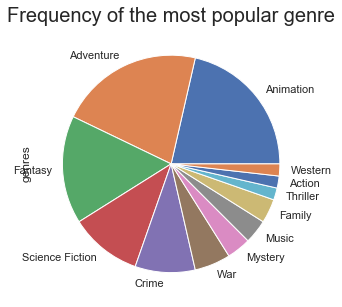

In [39]:
#Let's make a pie chart to see
#which genre is the most popular. 
mergedf['genres'].value_counts().plot(kind = 'pie',figsize = (10,5))
plt.title('Frequency of the most popular genre',fontsize=20);

In [40]:
#It looks Animation and Adventure movies are almost same...
#see numbers
mergedf['genres'].value_counts()

Animation          12
Adventure          12
Fantasy             9
Science Fiction     6
Crime               5
War                 3
Mystery             2
Music               2
Family              2
Thriller            1
Action              1
Western             1
Name: genres, dtype: int64

## Animation and Adventure are equaly the most popular genre!

>## ②What kinds of properties are associated with movies that have high revenues?

In [41]:
# First, get a overall looking
df.describe()

,id,popularity,runtime,vote_average,release_year,budget,revenue
count,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,2.420500e+04,2.420500e+04
mean,57056.267920,0.747871,103.224375,5.958211,2000.375749,2.257252e+07,6.578433e+07
std,85986.455121,1.152706,27.729100,0.897810,12.954119,3.908647e+07,1.672946e+08
min,5.000000,0.000188,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9967.000000,0.246552,91.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,16781.000000,0.438899,100.000000,6.000000,2004.000000,1.839999e+06,3.337797e+01
75%,54553.000000,0.830597,113.000000,6.600000,2010.000000,3.022621e+07,5.325335e+07
max,417859.000000,32.985763,877.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [42]:
#We do not want any zero values
revenue_fix = df.query('revenue > 1')
revenue_fix.describe().revenue

count    1.215400e+04
mean     1.310112e+08
std      2.172417e+08
min      2.370705e+00
25%      1.418336e+07
50%      5.259365e+07
75%      1.543170e+08
max      2.827124e+09
Name: revenue, dtype: float64

In [43]:
#See correlation
revenue_fix.corr()

,id,popularity,runtime,vote_average,release_year,budget,revenue
id,1.000000,0.160597,-0.023080,0.013992,0.489622,-0.120474,-0.093099
popularity,0.160597,1.000000,0.194512,0.303638,0.192602,0.429828,0.559542
runtime,-0.023080,0.194512,1.000000,0.312795,-0.099554,0.295668,0.263007
vote_average,0.013992,0.303638,0.312795,1.000000,-0.097920,0.065391,0.264787
release_year,0.489622,0.192602,-0.099554,-0.097920,1.000000,0.126585,-0.070444
budget,-0.120474,0.429828,0.295668,0.065391,0.126585,1.000000,0.585183
revenue,-0.093099,0.559542,0.263007,0.264787,-0.070444,0.585183,1.000000


In [44]:
#Budget and revenue are most correlated(0.585183)

In [45]:
#Group high and low revenue 
high_revenue = revenue_fix.query('revenue > 1.394771e+08')
low_revenue = revenue_fix.query('revenue < 1.394771e+08')

In [46]:
#Get mean values of high and low budget movies
x1 = high_revenue['budget'].mean()
x2 = low_revenue['budget'].mean()
x1,x2

(84804123.66470885, 24074686.433361273)

In [47]:
#High revenue movie has 3.5 times more budget than low revenue movies!
x1/x2

3.522543228110017

In [48]:
# Let's make a bar cahrt about average budget for each group
# to confirm the relationship

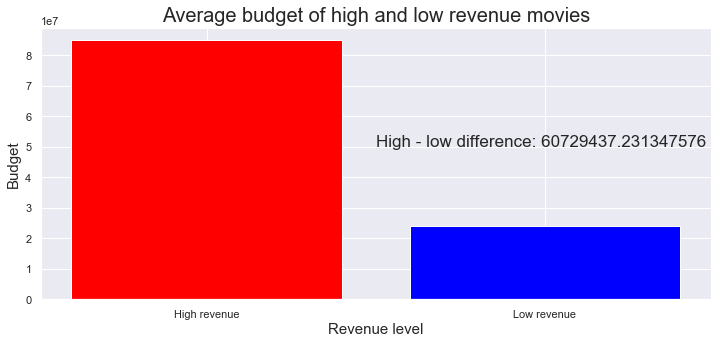

In [49]:
plt.figure(figsize = (12,5))
plt.bar((1,2),(x1,x2), tick_label = ('High revenue','Low revenue'),color= ('red','blue'))
plt.text(1.5,5*1e7, r'High - low difference: {}'.format(x1-x2), fontsize=17)
plt.title('Average budget of high and low revenue movies',fontsize=20)
plt.xlabel('Revenue level',fontsize=15)
plt.ylabel('Budget',fontsize=15);

### The graph clearly indicates that higher budget movies make higher revenues.

>## ③Do longer movies get higher vote?

In [50]:
#We do not want movies have zero runtime
df = df.query('runtime > 1')

In [51]:
#Check correlation
df[['vote_average','runtime']].corr()

,vote_average,runtime
vote_average,1.000000,0.179482
runtime,0.179482,1.000000


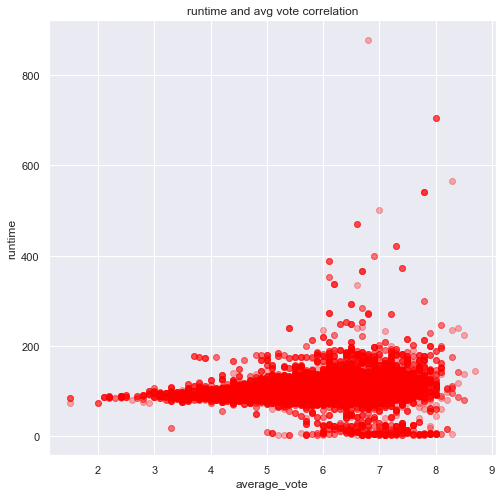

In [52]:
#Let's make a scatter chart to see the relationship of data
x = df['vote_average']
y = df['runtime']
plt.figure(figsize = (8,8))
plt.scatter(x, y, color = 'red', alpha = .3)
plt.title('runtime and avg vote correlation')
plt.xlabel('average_vote')
plt.ylabel('runtime');

### It looks runtime and average vote have a slight positive relationship.

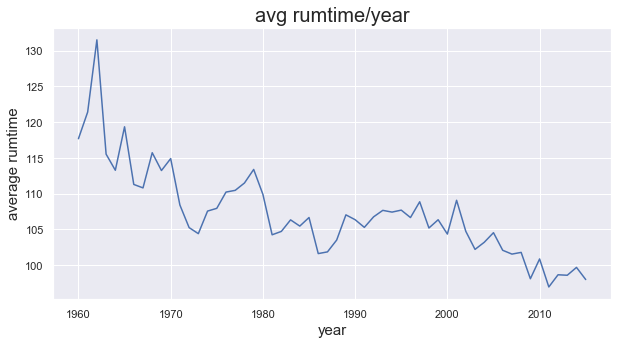

In [53]:
#Trend of movie average runtime each year
df.groupby(['release_year'])['runtime'].mean().plot(figsize = (10,5))
plt.title('avg rumtime/year',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('average rumtime',fontsize=15);

### According to the avg runtime/year graph, movie runtime has a trend, it is getting shorter by year.

>### ⑤Which director make more profit?

In [54]:
#Break down director
#There are some datas has multiple director names

In [55]:
#Load edited dataframe
df=pd.read_csv('tmdb-movies_edited.csv')

In [56]:
#'director'needs a modification as some data has multipul information
multi_director = df[df['director'].str.contains('\|')]
multi_director

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget,revenue
8,211672,7.404165,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015,6.807997e+07,1.064192e+09
11,76757,6.189369,Jupiter Ascending,Lana Wachowski|Lilly Wachowski,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,5.2,2015,1.619199e+08,1.692686e+08
64,256591,2.395366,Focus,Glenn Ficarra|John Requa,105,Romance|Comedy|Crime|Drama,Kramer & Sigman Films|RatPac-Dune Entertainmen...,6.7,2015,4.609198e+07,1.416459e+08
85,296099,2.000338,Vacation,John Francis Daley|Jonathan M. Goldstein,99,Adventure|Comedy,New Line Cinema|BenderSpink|David Dobkin Produ...,6.1,2015,2.851999e+07,9.603341e+07
100,326359,1.724712,Frozen Fever,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,7.0,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
9736,10766,0.236193,Damien: Omen II,Don Taylor|Mike Hodges,107,Action|Drama|Horror|Thriller,Twentieth Century Fox Film Corporation|Mace Ne...,6.1,1978,2.273036e+07,8.864292e+07
9740,148980,0.214124,Battlestar Galactica,Richard A. Colla|Alan J. Levi,125,Science Fiction|Adventure,Universal TV|Glen A. Larson Productions,5.8,1978,1.002810e+07,0.000000e+00
9743,12185,0.188821,Heaven Can Wait,Warren Beatty|Buck Henry,101,Fantasy|Drama|Comedy|Romance,Paramount Pictures,6.3,1978,0.000000e+00,0.000000e+00
9762,13377,1.227582,How the Grinch Stole Christmas!,Chuck Jones|Ben Washam,26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,7.1,1966,2.116175e+06,0.000000e+00


In [57]:
#I will split them into 4, just like I did for 'genre'
def func(director_index):
    
#make copies
    dfx = multi_director.copy(deep = True)
    
#assign into each df with only one director
    dfx['director'] = dfx['director'].apply(lambda x: x.split('|')[director_index])
    return dfx

In [58]:
df1 = func(0)
df2 = func(1)
df3 = func(-1)
df4 = func(-2)

In [59]:
##Append dataframes together then drop duplicates
new_rows = df4.append(df3.append(df1.append(df2)))
new_rows.drop_duplicates(inplace= True)

In [60]:
#Check for duplicates
new_rows.duplicated().any()

False

In [61]:
#Check how it looks
new_rows.head(1)

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget,revenue
8,211672,7.404165,Minions,Kyle Balda,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015,6.807997e+07,1.064192e+09


In [62]:
#Drop multigenres from original df
#Then append new_rows to original df
df.drop(multi_director.index, inplace=True)

In [63]:
df = df.append(new_rows)

In [64]:
#Profit is culculated by sales minus cost. Let's use revenue and budget here.
df['rev_rank']=df['revenue'].rank(ascending=False)

In [65]:
#Figure out top 50 movies with revenue
top50=df.sort_values('rev_rank', ascending=True).head(50)

In [66]:
#And top 50 high budget movies
top50['bud_rank']=top50['budget'].rank(ascending=False)

In [67]:
#Culculate profit
top50['profit']=(top50['revenue'])-(top50['budget'])

In [68]:
#Show top movie rank
top50['total_rank']=top50['profit'].rank(ascending=False)

In [69]:
#Show it from 1
top50.sort_values('profit', ascending=False).head(50)

,id,popularity,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget,revenue,rev_rank,bud_rank,profit,total_rank
1199,11,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09,2.0,41.0,2.750137e+09,1.0
1254,19995,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,1.0,4.0,2.586237e+09,2.0
4648,597,4.355219,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09,3.0,2.0,2.234714e+09,3.0
9544,9552,2.010733,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,7.2,1973,3.928928e+07,2.167325e+09,4.0,42.0,2.128036e+09,4.0
8789,578,2.563191,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,7.3,1975,2.836275e+07,1.907006e+09,5.0,48.0,1.878643e+09,5.0
7936,601,2.900556,E.T. the Extra-Terrestrial,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,7.2,1982,2.372625e+07,1.791694e+09,7.0,50.0,1.767968e+09,6.0
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,6.0,14.0,1.718723e+09,7.0
7194,1642,1.136610,The Net,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,5.6,1995,3.148127e+07,1.583050e+09,8.0,43.0,1.551568e+09,8.0
9082,12230,2.631987,One Hundred and One Dalmatians,Hamilton Luske,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,6.6,1961,2.917944e+07,1.574815e+09,10.0,46.0,1.545635e+09,10.0
9082,12230,2.631987,One Hundred and One Dalmatians,Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,6.6,1961,2.917944e+07,1.574815e+09,10.0,46.0,1.545635e+09,10.0


In [70]:
#Let's see who is the most profitable.
#Some director have multipul title in the ranking, so I will take the mean value.
rich_director=top50.groupby(['director'])['profit'].mean()
rich_director

director
Andrew Adamson          8.887368e+08
Andrew Stanton          9.134635e+08
Chris Buck              1.052306e+09
Chris Columbus          9.950657e+08
Christopher Nolan       8.083221e+08
Clyde Geronimi          1.545635e+09
Colin Trevorrow         1.254446e+09
Conrad Vernon           8.887368e+08
David Yates             1.166009e+09
Francis Ford Coppola    1.246626e+09
George Lucas            1.904788e+09
Gore Verbinski          8.157552e+08
Hamilton Luske          1.545635e+09
Irvin Kershner          1.376998e+09
Irwin Winkler           1.551568e+09
J.J. Abrams             1.718723e+09
James Cameron           2.410475e+09
James Wan               1.210949e+09
Jennifer Lee            1.052306e+09
Joss Whedon             1.134640e+09
Kelly Asbury            8.887368e+08
Kyle Balda              9.961120e+08
Lee Unkrich             8.883177e+08
Michael Bay             9.003255e+08
Peter Jackson           1.066847e+09
Pierre Coffin           9.961120e+08
Richard Marquand        1.182

In [71]:
#Show the ranking from top
rich_director=rich_director.sort_values(ascending=False)

In [72]:
rich_director

director
James Cameron           2.410475e+09
William Friedkin        2.128036e+09
George Lucas            1.904788e+09
J.J. Abrams             1.718723e+09
Irwin Winkler           1.551568e+09
Clyde Geronimi          1.545635e+09
Hamilton Luske          1.545635e+09
Steven Spielberg        1.490347e+09
Wolfgang Reitherman     1.432520e+09
Irvin Kershner          1.376998e+09
Colin Trevorrow         1.254446e+09
Francis Ford Coppola    1.246626e+09
James Wan               1.210949e+09
Richard Marquand        1.182995e+09
David Yates             1.166009e+09
Joss Whedon             1.134640e+09
Rob Minkoff             1.093392e+09
Roger Allers            1.093392e+09
Robert Wise             1.072786e+09
Peter Jackson           1.066847e+09
Chris Buck              1.052306e+09
Jennifer Lee            1.052306e+09
Roland Emmerich         1.031498e+09
Kyle Balda              9.961120e+08
Pierre Coffin           9.961120e+08
Chris Columbus          9.950657e+08
Shane Black             9.504

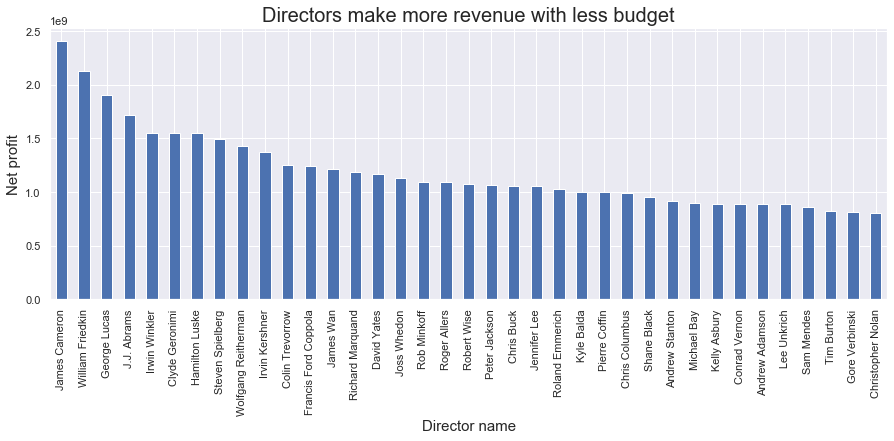

In [73]:
#Let's visualize the data
rich_director.plot(kind='bar',figsize = (15,5))
plt.title('Directors make more revenue with less budget',fontsize=20)
plt.xlabel('Director name',fontsize=15)
plt.ylabel('Net profit',fontsize=15);

### James Cameron, William Friedkin, George Lucas, and J.J Abramus are making significantly high profit. 

<a id='conclusions'></a>
>## Conclusions

### There were interesting discoveries throughout the investigation. 'Adventure' is currently
### the most popular movie genre, but 'Animation' is also equally popular when we look at the entire trend.
### And budget is assiciated with revenue. High revenue movies has high budget, it is 3 times higher than
### low revenue movies. Longer movies tend to get higher vote, although there are many successful movies 
### with shorter movie length. Longer movies were popular back in 1960s, but movie length is getting shorter
### in general these days. Movie directors has the most profit(revenue - budget) all time are James Cameron, 
### William Friedkin, George Lucas, and J.J Abramus.

>## Thank you so much for reading my investigation!